In [2]:
import pandas as pd

# Load the marketset
market = pd.read_csv('market.csv')
market['Date'] = pd.to_datetime(market['Date'])

# Display basic information about the marketset
market_info = market.info()

# Display the first few rows to understand the marketset's structure and content
market_head = market.head()

market_info, market_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7646 entries, 0 to 7645
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7646 non-null   datetime64[ns]
 1   jpm_hist_vol_10   7646 non-null   float64       
 2   jpm_hist_vol_30   7646 non-null   float64       
 3   jpm_hist_vol_50   7646 non-null   float64       
 4   jpm_hist_vol_100  7646 non-null   float64       
 5   jpm_adj_close     7646 non-null   float64       
 6   jpm_volume        7646 non-null   int64         
 7   bac_adj_close     7646 non-null   float64       
 8   bac_volume        7646 non-null   int64         
 9   msft_adj_close    7646 non-null   float64       
 10  msft_volume       7646 non-null   int64         
 11  jnj_adj_close     7646 non-null   float64       
 12  jnj_volume        7646 non-null   int64         
 13  spx_adj_close     7646 non-null   float64       
 14  spx_volume        7646 n

(None,
         Date  jpm_hist_vol_10  jpm_hist_vol_30  jpm_hist_vol_50  \
 0 2023-08-18           15.741           16.794           17.201   
 1 2023-08-17           16.191           16.849           17.200   
 2 2023-08-16           15.964           16.583           17.091   
 3 2023-08-15           16.948           16.856           17.037   
 4 2023-08-14           11.697           15.349           16.012   
 
    jpm_hist_vol_100  jpm_adj_close  jpm_volume  bac_adj_close  bac_volume  \
 0            21.070         148.97     8517460          29.11    31430361   
 1            21.071         148.63     9953912          29.28    37202231   
 2            21.421         150.19     6978235          29.29    47220396   
 3            21.579         150.83    10300303          29.94    43406068   
 4            21.117         154.77     5044282          30.93    32563693   
 
    msft_adj_close  ...   ry_30d_ma     ry_rsi  wfc_10d_ma  wfc_20d_ma  \
 0          320.40  ...  121.250333  56

In [3]:
# Use backward fill to replace NaN values for the specified columns
market['CPI'] = market['CPI'].fillna(method='bfill')
market['CCI'] = market['CCI'].fillna(method='bfill')
market['UE'] = market['UE'].fillna(method='bfill')
market['GDP'] = market['GDP'].fillna(method='bfill')
market['FEDL01'] = market['FEDL01'].fillna(method='bfill')

# Display the first few rows to confirm changes
market[['Date', 'CPI', 'CCI', 'UE', 'GDP', 'FEDL01']].head(10)

,Date,CPI,CCI,UE,GDP,FEDL01
0,2023-08-18,3.2,114.0,3.5,2.1,5.33
1,2023-08-17,3.2,114.0,3.5,2.1,5.33
2,2023-08-16,3.2,114.0,3.5,2.1,5.33
3,2023-08-15,3.2,114.0,3.5,2.1,5.33
4,2023-08-14,3.2,114.0,3.5,2.1,5.33
5,2023-08-11,3.2,114.0,3.5,2.1,5.33
6,2023-08-10,3.2,114.0,3.5,2.1,5.33
7,2023-08-09,3.2,114.0,3.5,2.1,5.33
8,2023-08-08,3.2,114.0,3.5,2.1,5.33
9,2023-08-07,3.2,114.0,3.5,2.1,5.33


In [4]:
# Checking for NA values in the dataset
na_values = market.isna().sum()

# Displaying the columns with NA values and their counts, if any exist
na_columns_with_count = na_values[na_values > 0]

print(na_columns_with_count)

Series([], dtype: int64)


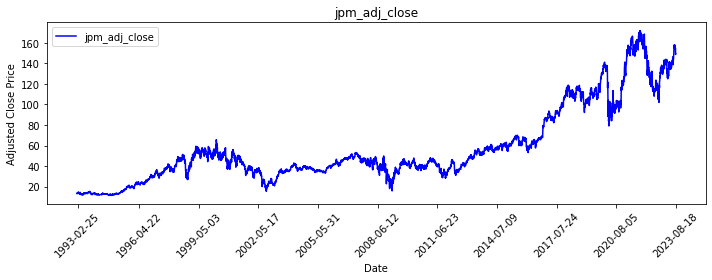

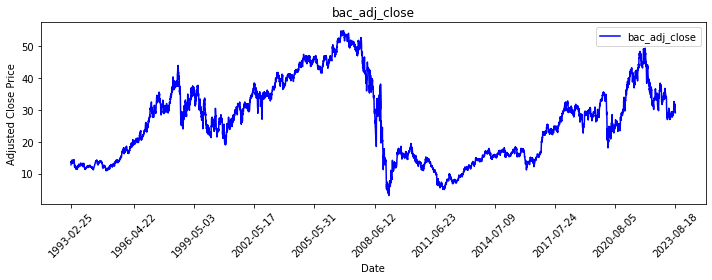

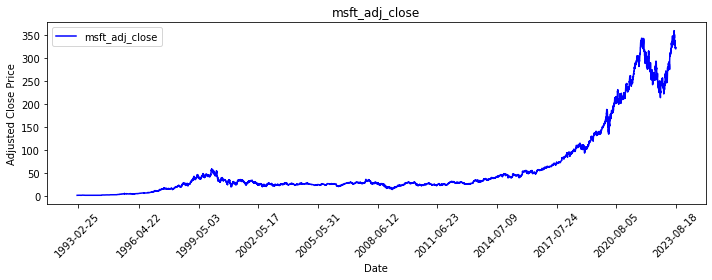

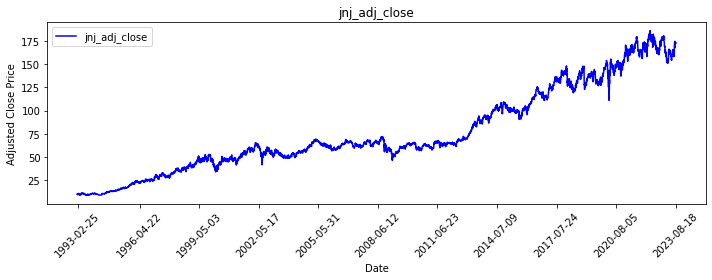

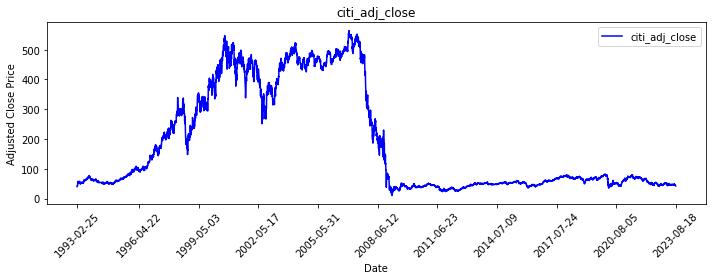

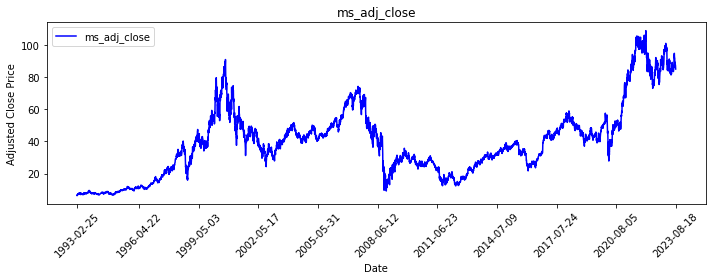

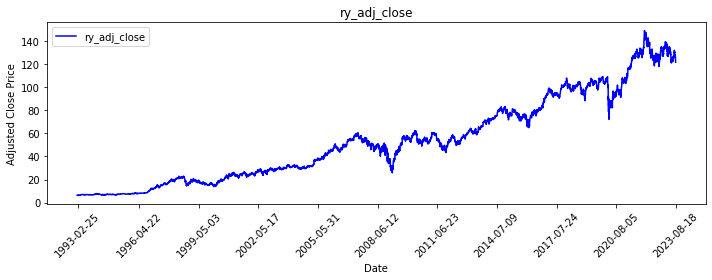

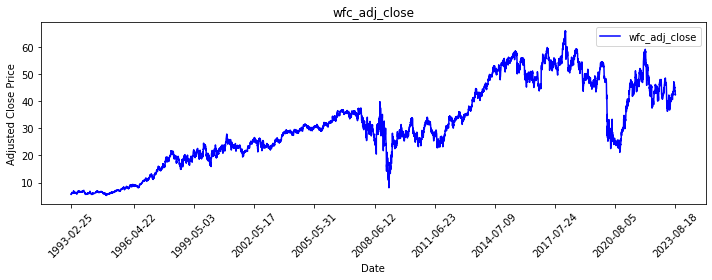

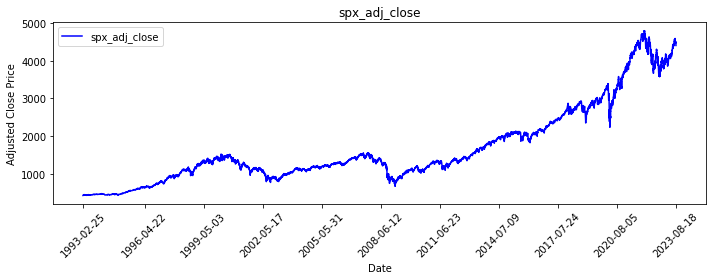

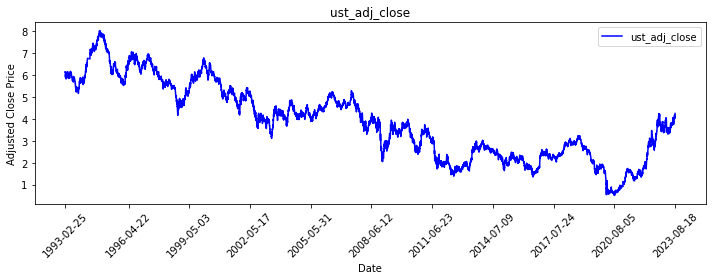

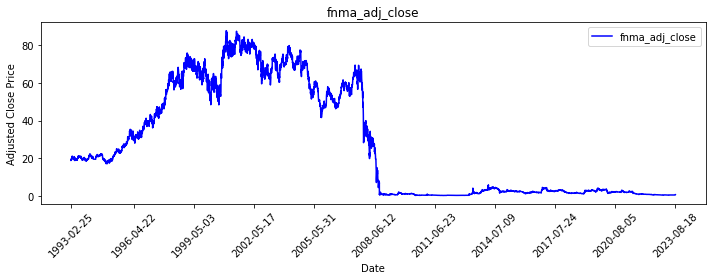

In [5]:
# Plotting each stock and index on its own individual plot
import matplotlib.pyplot as plt

# List of stock and index columns to plot
columns_to_plot = ['jpm_adj_close', 'bac_adj_close', 'msft_adj_close', 'jnj_adj_close', 'citi_adj_close', 
'ms_adj_close', 'ry_adj_close', 'wfc_adj_close', 'spx_adj_close', 'ust_adj_close', 'fnma_adj_close']

# Creating individual plots for each column
for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    plt.plot(market['Date'], market[col], label=col, color='blue')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.xticks(market['Date'][::len(market) // 10], rotation=45)  # Show only a subset of dates for clarity
    plt.legend()
    plt.tight_layout()
    plt.show()

## Univariate Analysis

In [6]:
market.describe()

,Date,jpm_hist_vol_10,jpm_hist_vol_30,jpm_hist_vol_50,jpm_hist_vol_100,jpm_adj_close,jpm_volume,bac_adj_close,bac_volume,msft_adj_close,...,ry_30d_ma,ry_rsi,wfc_10d_ma,wfc_20d_ma,wfc_30d_ma,wfc_rsi,citi_10d_ma,citi_20d_ma,citi_30d_ma,citi_rsi
count,7646,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7.646000e+03,7646.000000,7.646000e+03,7646.000000,...,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000
mean,2008-06-06 08:18:42.469264896,30.140509,31.212724,31.581160,32.068115,57.305845,1.671715e+07,26.676916,6.396726e+07,61.465473,...,54.029746,46.404497,31.130574,31.153553,31.176648,48.049848,183.992755,183.989479,183.983284,48.626508
min,1993-02-18 00:00:00,2.598000,7.040000,9.347000,11.912000,11.375000,3.750000e+05,3.140000,4.228000e+05,2.218800,...,6.362700,0.000000,5.528140,5.600015,5.657307,2.828765,12.810000,18.260000,21.316667,3.245750
25%,2000-10-27 18:00:00,16.650250,18.742250,19.597000,20.164750,35.161675,7.115788e+06,15.420000,8.801300e+06,24.910000,...,22.719500,34.313180,21.657060,21.669894,21.645430,37.498500,49.885833,50.006625,50.096833,36.718694
50%,2008-06-09 12:00:00,24.235500,25.278000,26.010000,26.541000,44.700000,1.150410e+07,27.000000,3.349437e+07,29.330000,...,49.394000,46.380306,29.488250,29.545250,29.522833,47.844509,70.413500,70.365250,70.293500,48.150151
75%,2016-01-11 18:00:00,35.858500,36.222750,36.573500,35.676500,64.128750,1.912757e+07,35.187500,8.201426e+07,52.402500,...,79.310958,58.536585,44.201750,44.239625,44.223250,58.791458,351.541335,347.613331,347.762310,60.344833
max,2023-08-18 00:00:00,215.470000,150.144000,145.423000,134.041000,171.780000,2.172942e+08,54.900000,1.226791e+09,359.490000,...,145.020667,99.191080,65.289000,64.151000,63.178333,96.666667,553.500000,549.590000,548.156667,100.000000
std,NaN,22.717917,20.711070,20.045658,19.188390,36.989187,1.785334e+07,12.257290,9.282117e+07,77.535076,...,36.850326,17.096105,14.691451,14.661815,14.633512,15.418608,175.015990,174.921811,174.828519,16.498684


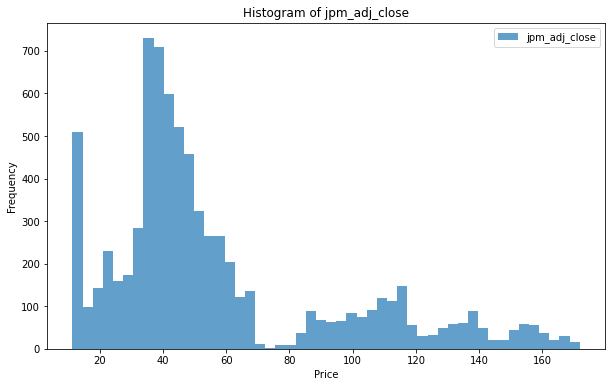

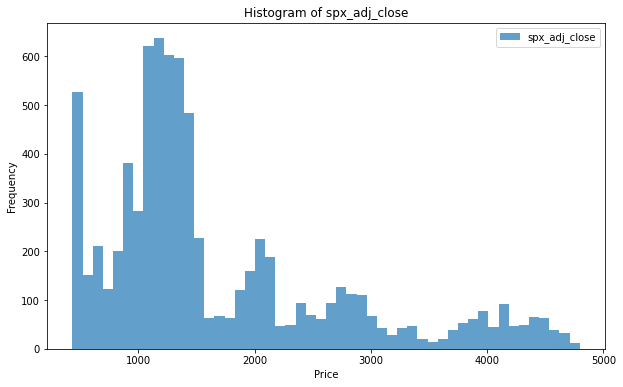

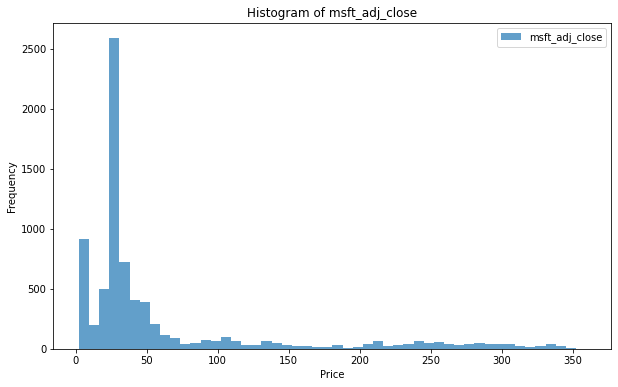

In [7]:
import matplotlib.pyplot as plt

stock_price_columns = [
    'jpm_adj_close', 'spx_adj_close', 'msft_adj_close',
    'bac_adj_close', 'citi_adj_close', 'ms_adj_close',
    'ry_adj_close', 'wfc_adj_close', 'jnj_adj_close'
]

# Limiting to the first 3 stocks to prevent timeout and for readability
for col in stock_price_columns[:3]:  # Slicing to first 3 stocks for example
    plt.figure(figsize=(10, 6))
    plt.hist(market[col].dropna(), bins=50, alpha=0.7, label=col)  # Using .dropna() to remove NaN values that can't be histogrammed
    plt.title(f'Histogram of {col}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

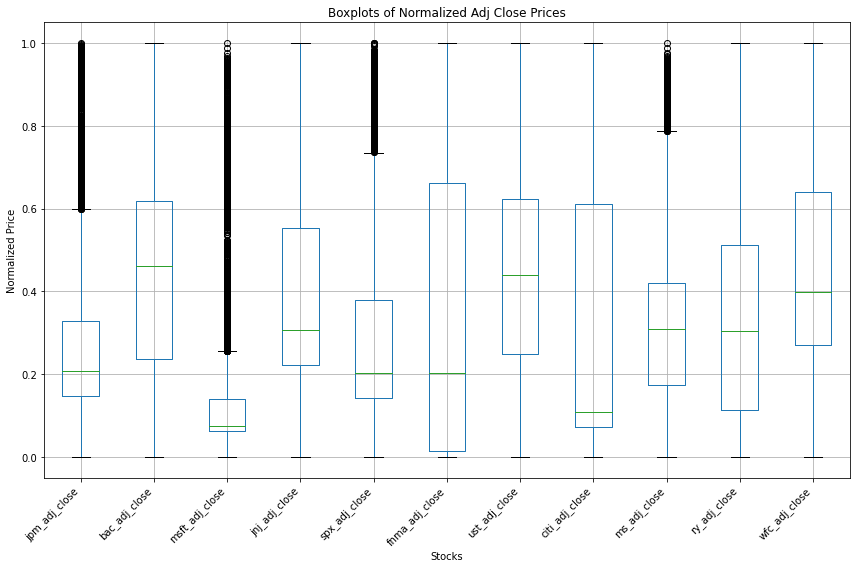

In [8]:
# Selecting only the 'adj_close' price columns from the market dataset
adj_close_columns = [col for col in market.columns if 'adj_close' in col]

# Extracting the relevant columns from the market dataset
adj_close_data = market[adj_close_columns]

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the adj_close data
normalized_adj_close_data = scaler.fit_transform(adj_close_data)

# Convert the normalized data back to a DataFrame
normalized_adj_close_df = pd.DataFrame(normalized_adj_close_data, columns=adj_close_columns)

# Plotting boxplots for each normalized 'adj_close' price variable
plt.figure(figsize=(12, 8))
normalized_adj_close_df.boxplot(rot=90)
plt.title('Boxplots of Normalized Adj Close Prices')
plt.xlabel('Stocks')
plt.ylabel('Normalized Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Bivariate Analysis

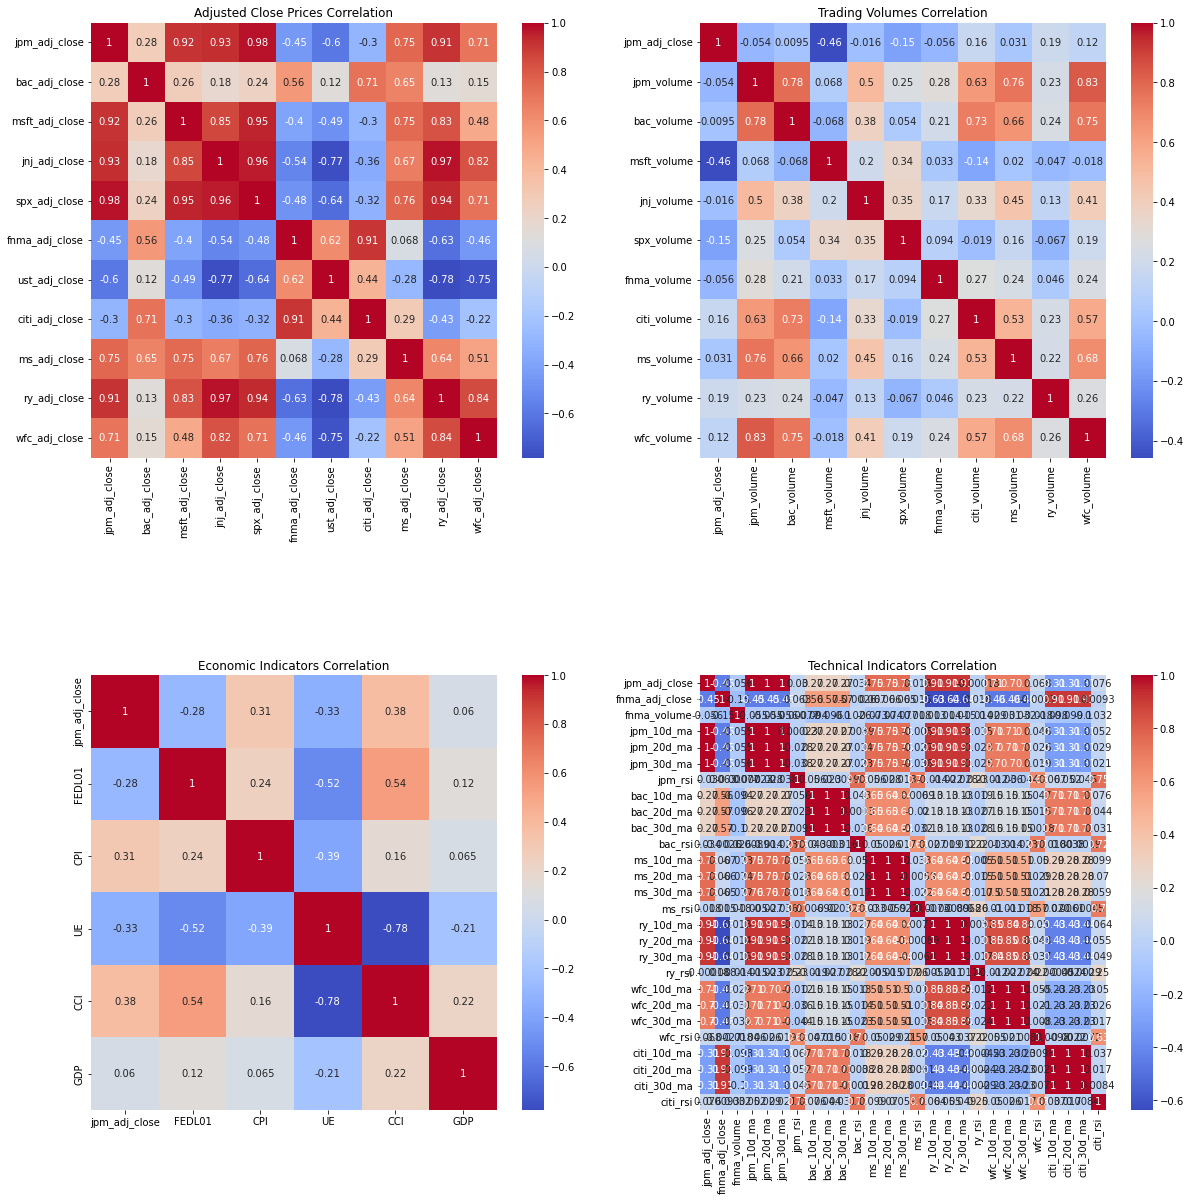

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'market' is your DataFrame with all the data

# Filter columns for each category, making sure to include 'jpm_adj_close'
adj_close_columns = ['jpm_adj_close'] + [col for col in market.columns if 'adj_close' in col and col != 'jpm_adj_close']
volume_columns = ['jpm_adj_close'] + [col for col in market.columns if 'volume' in col]
economic_indicators_columns = ['jpm_adj_close', 'FEDL01', 'CPI', 'UE', 'CCI', 'GDP']
technical_indicators_columns = ['jpm_adj_close'] + [col for col in market.columns if any(sub in col for sub in ['ma', 'rsi'])]
#volatility_columns = ['jpm_adj_close'] + [col for col in market.columns if any(sub in col for sub in ['vol'])]

# Create correlation matrices
adj_close_corr = market[adj_close_columns].corr()
volume_corr = market[volume_columns].corr()
economic_indicators_corr = market[economic_indicators_columns].corr()
technical_indicators_corr = market[technical_indicators_columns].corr()
#volatility_corr = market[volatility_columns].corr()

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Adjust space between plots
plt.subplots_adjust(hspace=0.5, wspace=0.2)

# Plotting the heatmaps
sns.heatmap(adj_close_corr, ax=axes[0, 0], annot=True, cmap='coolwarm')
axes[0, 0].set_title('Adjusted Close Prices Correlation')

sns.heatmap(volume_corr, ax=axes[0, 1], annot=True, cmap='coolwarm')
axes[0, 1].set_title('Trading Volumes Correlation')

sns.heatmap(economic_indicators_corr, ax=axes[1, 0], annot=True, cmap='coolwarm')
axes[1, 0].set_title('Economic Indicators Correlation')

sns.heatmap(technical_indicators_corr, ax=axes[1, 1], annot=True, cmap='coolwarm')
axes[1, 1].set_title('Technical Indicators Correlation')

#sns.heatmap(volatility_corr, ax=axes[1, 1], annot=True, cmap='coolwarm')
#axes[1, 1].set_title('Volatility Correlation')

plt.show()

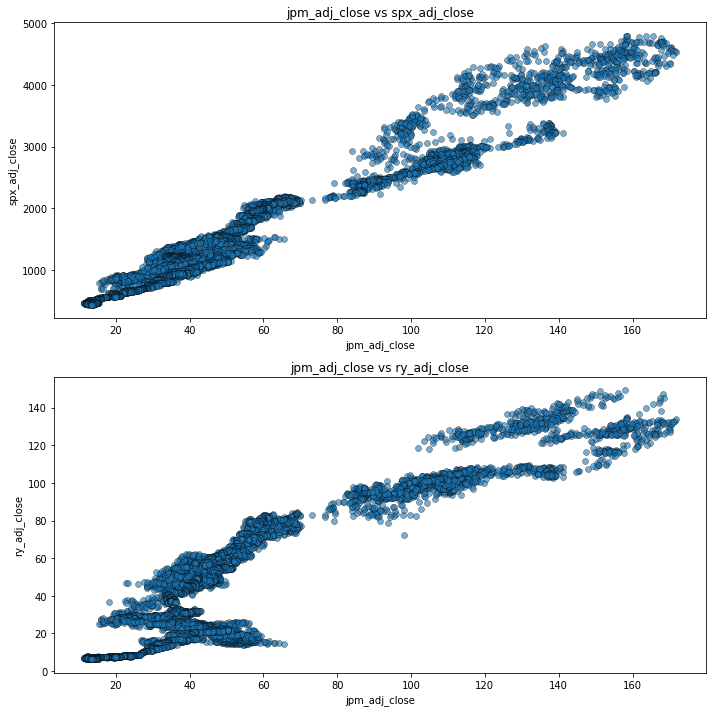

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns for the plots
y_variables = [
    'spx_adj_close', 'ry_adj_close'
    #'jpm_hist_vol_50', 'jpm_hist_vol_100',
    #'jnj_adj_close', 'jpm_20d_ma',
    #'ry_adj_close', 'jpm_rsi', 'jpm_hist_vol_10'
]

# Filter the dataframe to include only the selected columns along with 'jpm_adj_close'
market_subset = market[['jpm_adj_close'] + y_variables]

# Number of rows for subplots
n_rows = len(y_variables)

# Create a figure with subplots
plt.figure(figsize=(10, 5 * n_rows))

# Create individual scatter plots for each variable against 'jpm_adj_close'
for i, var in enumerate(y_variables, 1):
    plt.subplot(n_rows, 1, i)
    sns.scatterplot(x='jpm_adj_close', y=var, data=market_subset, edgecolor='k', alpha=0.6)
    plt.title(f'jpm_adj_close vs {var}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only the numerical features for normalization
numerical_data = market.select_dtypes(include=['float64', 'int64'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(numerical_data)

# Creating a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numerical_data.columns)

# Adding the 'Date' column back to the normalized dataframe
normalized_df.insert(0, 'Date', market['Date'])

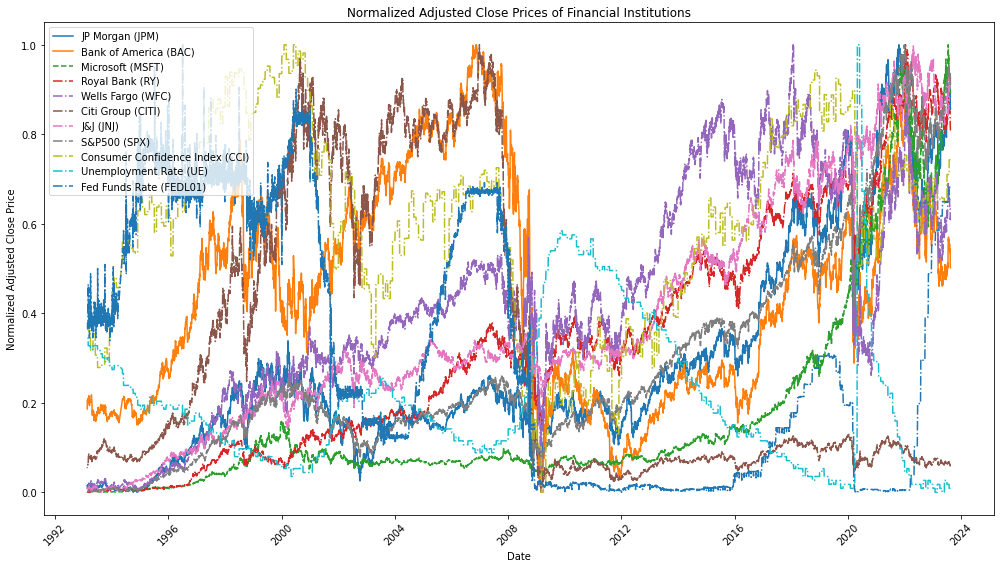

In [12]:
import matplotlib.pyplot as plt

# Preparing data for plotting
jpm_data = normalized_df[['Date', 'jpm_adj_close']]
bac_data = normalized_df[['Date', 'bac_adj_close']]
msft_data = normalized_df[['Date', 'msft_adj_close']]
ry_data = normalized_df[['Date', 'ry_adj_close']]  
wfc_data = normalized_df[['Date', 'wfc_adj_close']]  
citi_data = normalized_df[['Date', 'citi_adj_close']]  
jnj_data = normalized_df[['Date', 'jnj_adj_close']]
spx_data = normalized_df[['Date', 'spx_adj_close']]
CCI_data = normalized_df[['Date', 'CCI']]
UE_data = normalized_df[['Date', 'UE']]
FEDL01_data = normalized_df[['Date', 'FEDL01']]


# Plotting
plt.figure(figsize=(14, 8))

plt.plot(jpm_data['Date'], jpm_data['jpm_adj_close'], label='JP Morgan (JPM)')
plt.plot(bac_data['Date'], bac_data['bac_adj_close'], label='Bank of America (BAC)')
plt.plot(msft_data['Date'], msft_data['msft_adj_close'], label='Microsoft (MSFT)', linestyle='--')  # Not a financial institution, but included
plt.plot(ry_data['Date'], ry_data['ry_adj_close'], label='Royal Bank (RY)', linestyle='-.')
plt.plot(wfc_data['Date'], wfc_data['wfc_adj_close'], label='Wells Fargo (WFC)', linestyle='-.')
plt.plot(citi_data['Date'], citi_data['citi_adj_close'], label='Citi Group (CITI)', linestyle='-.')
plt.plot(jnj_data['Date'], jnj_data['jnj_adj_close'], label='J&J (JNJ)', linestyle='-.')
plt.plot(spx_data['Date'], spx_data['spx_adj_close'], label='S&P500 (SPX)', linestyle='-.')
plt.plot(CCI_data['Date'], CCI_data['CCI'], label='Consumer Confidence Index (CCI)', linestyle='-.')
plt.plot(UE_data['Date'], UE_data['UE'], label='Unemployment Rate (UE)', linestyle='-.')
plt.plot(FEDL01_data['Date'], FEDL01_data['FEDL01'], label='Fed Funds Rate (FEDL01)', linestyle='-.')


plt.title('Normalized Adjusted Close Prices of Financial Institutions')
plt.xlabel('Date')
plt.ylabel('Normalized Adjusted Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Replace 'feature1', 'feature2', etc., with actual column names from your DataFrame.
features = ['jpm_adj_close', 'jnj_adj_close', 'msft_adj_close', 'spx_adj_close', 'bac_adj_close', 'wfc_adj_close', 
            'ry_adj_close', 'ms_adj_close', 'citi_adj_close', 'UE', 'FEDL01', 'CCI']  # Add other feature names as strings in this list

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
normalized_df_scaled_features = scaler.fit_transform(normalized_df[features])

# Creating a new DataFrame for the scaled features
normalized_df_scaled = pd.DataFrame(normalized_df_scaled_features, columns=features)

# Optionally, if you want to include the scaled features back into your original DataFrame:
for feature in features:
    normalized_df[f'scaled_{feature}'] = normalized_df_scaled[feature]

In [14]:
from sklearn.model_selection import train_test_split

X = normalized_df[features].values  # Predictor
y = normalized_df['jpm_adj_close'].values  # Target

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

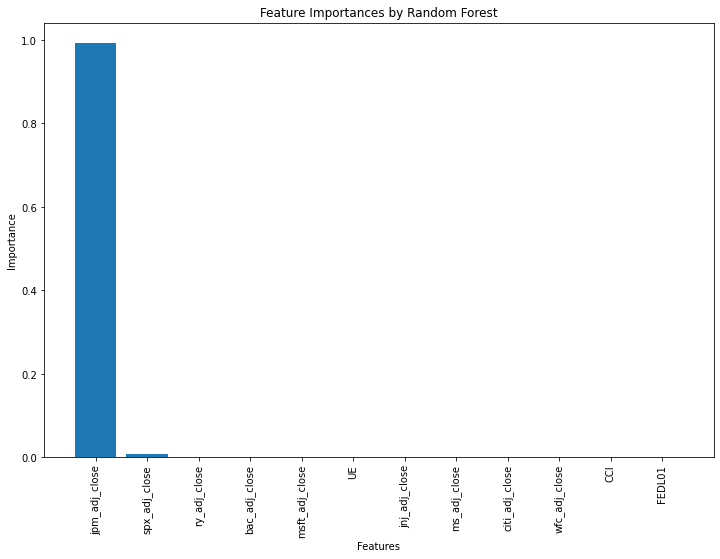

In [15]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Training a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Plotting feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

features = normalized_df_scaled.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances by Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
# Correcting the indexing in plt.xticks to use the DataFrame column names
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

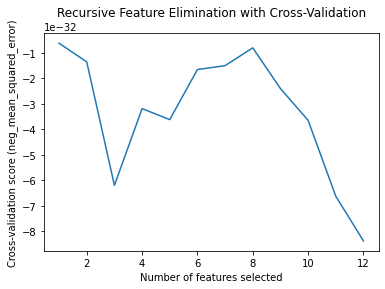

Optimal number of features : 1
Selected features:  ['jpm_adj_close']


In [16]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Linear regression model for RFE
model_lr = LinearRegression()

# RFE with cross-validation
rfe_cv = RFECV(estimator=model_lr, step=1, cv=5, scoring='neg_mean_squared_error')
rfe_cv.fit(X_train, y_train)

# Plotting the number of features VS. cross-validation scores
plt.figure()
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfe_cv.cv_results_['mean_test_score']) + 1), rfe_cv.cv_results_['mean_test_score'])
plt.show()

print("Optimal number of features : %d" % rfe_cv.n_features_)
# Make sure `features` is a numpy array or adjust this line to match your actual features list handling
print('Selected features: ', np.array(features)[rfe_cv.support_])

#### The RFECV method will automatically choose the number of features that resulted in the highest cross-validation score. This is the model's way of balancing the trade-off between too few features (underfitting) and too many (overfitting or unnecessary complexity). The lower the value (closer to 0), the better the model is at predicting the target variable. Because it's negative, a higher value on the plot actually means a lower absolute mean squared error, which is better. It looks like 8 features is a good number for the model but 1-2 is best.

Number of features before selection: 12
Number of features after selection: 2


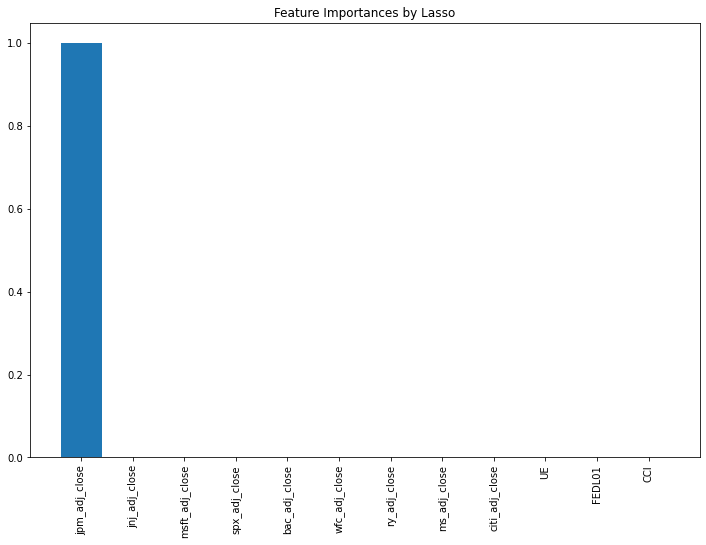

In [17]:
# L1 Regularization for Feature Selection

from sklearn.linear_model import LassoCV

# Lasso for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Identifying important features
importance = np.abs(lasso.coef_)
print("Number of features before selection: {}".format(X_train.shape[1]))
print("Number of features after selection: {}".format(np.sum(importance > 0)))

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances by Lasso")
feature_names = np.array(features)
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=90)
plt.show()

# Since we can only use one feature in our analysis, we will stick to the S&P500 (spx_adj_close).

In [18]:
from sklearn.model_selection import train_test_split

# Extracting the 'spx_adj_close' as the feature and 'jpm_adj_close' as the target
X = normalized_df[['spx_adj_close']].values  # Predictor
y = normalized_df['jpm_adj_close'].values  # Target

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=42)
model_rf = RandomForestRegressor(random_state=42)

# Train the models
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to predict and evaluate a model
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Evaluate
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Training MSE: {mse_train:.4f}, MAE: {mae_train:.4f}")
    print(f"Validation MSE: {mse_val:.4f}, MAE: {mae_val:.4f}")
    print(f"Test MSE: {mse_test:.4f}, MAE: {mae_test:.4f}\n")

# Evaluate each model
evaluate_model(model_lr, X_train, y_train, X_val, y_val, X_test, y_test)
evaluate_model(model_dt, X_train, y_train, X_val, y_val, X_test, y_test)
evaluate_model(model_rf, X_train, y_train, X_val, y_val, X_test, y_test)

Model: LinearRegression
Training MSE: 0.0024, MAE: 0.0364
Validation MSE: 0.0025, MAE: 0.0375
Test MSE: 0.0026, MAE: 0.0386

Model: DecisionTreeRegressor
Training MSE: 0.0000, MAE: 0.0005
Validation MSE: 0.0028, MAE: 0.0342
Test MSE: 0.0029, MAE: 0.0339

Model: RandomForestRegressor
Training MSE: 0.0003, MAE: 0.0111
Validation MSE: 0.0021, MAE: 0.0296
Test MSE: 0.0022, MAE: 0.0304



## Deep Learning Model

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define the number of timesteps for the sequences and the list of features you want to include
n_timesteps = 120
features_list = ['spx_adj_close', 'jnj_adj_close', 'msft_adj_close', 
                'CCI', 'UE', 'FEDL01', 'jpm_20d_ma', 'jpm_rsi']

# Initialize the lists for sequences and targets
X, y = [], []

# Create sequences of 120 consecutive days for the selected features and the corresponding target
for i in range(n_timesteps, len(normalized_df)):
    X.append(normalized_df[features_list].iloc[i-n_timesteps:i].values)
    y.append(normalized_df['jpm_adj_close'].iloc[i])

# Convert the lists to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X to be in the form [samples, time steps, number_of_features]
X = np.reshape(X, (X.shape[0], X.shape[1], len(features_list)))

# Add a dimension to X to represent the single channel, required by Conv1D
X = np.reshape(X, (X.shape[0], X.shape[1], len(features_list), 1))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, TimeDistributed, Dropout
from tensorflow.keras.optimizers import Adam

# Adjust n_features based on the number of features you're using
n_timesteps = 120
n_features = len(features_list)  # Ensure this matches the actual number of features you are using

# Define the model
model = Sequential()

# Start with CNN layers for feature extraction
# TimeDistributed wrapper allows applying Conv1D across each timestep as an independent feature set
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(n_timesteps, n_features, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

# LSTM layer for understanding temporal dependencies
model.add(LSTM(units=50, return_sequences=False))

# Optionally add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer for prediction
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDi  (None, 120, 6, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_7 (TimeDi  (None, 120, 3, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_8 (TimeDi  (None, 120, 192)          0         
 stributed)                                                      
                                                                 
 lstm_3 (LSTM)               (None, 50)                48600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                      

In [27]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=1)

# If you want to include MAE as a metric during compilation and training (for future reference)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

36/36 [==============================] - 1s 14ms/step - loss: 3.2714e-04


In [29]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.014731690934607989
Mean Absolute Percentage Error (MAPE): inf%
